In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Salary_Data.csv", index_col=0)
df

,Salary
YearsExperience,
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
2.9,56642.0
3.0,60150.0
3.2,54445.0
3.2,64445.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, 1.1 to 10.5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salary  30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [4]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 1)

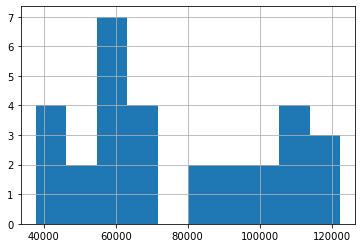

In [5]:
#outlier detection:
df['Salary'].hist()

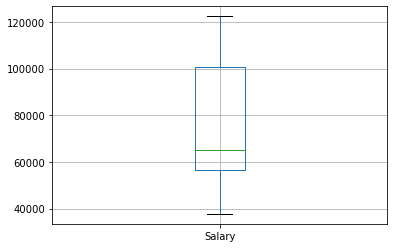

In [6]:
#Box plot
df.boxplot(column=['Salary'])

In [7]:
#Descriptive stat
df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [9]:
df.isnull()
#there are no missing values

,Salary
YearsExperience,
1.1,False
1.3,False
1.5,False
2.0,False
2.2,False
2.9,False
3.0,False
3.2,False
3.2,False


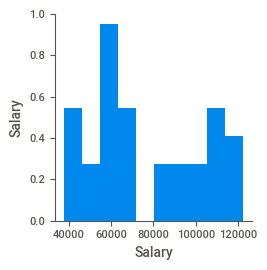

In [13]:
#Correlation analysis
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df)

In [14]:
df.corr()

,Salary
Salary,1.0


In [10]:
#EDA with pandas profiling
import pandas_profiling as pp
import sweetviz as sv

In [11]:
EDA_report = pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

In [12]:
sweet_report = sv.analyze(df)
sweet_report.show_html('salary.html')


Report salary.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [36]:
#Model building
import statsmodels.formula.api as smf

In [37]:
model = smf.ols("Salary~YearsExperience", data=df).fit()

In [38]:
#testing the model:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [39]:
#P value and T value:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [40]:
#R Squared value:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)